In [50]:
import tensorflow as tf
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, LearningRateScheduler
from time import time
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from matplotlib.pyplot import figure

In [6]:
# Loading the data, splitting up into test and trainign set 
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
#print(len(train_images), len(test_images))   #checking original sizes 

4431872/4422102 [==============================] - 0s 0us/step


In [7]:
# split training data into training and validation
train_images, validation_images, train_labels, validation_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=0)

In [8]:
#Setting class names so we can get an overview of the data
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

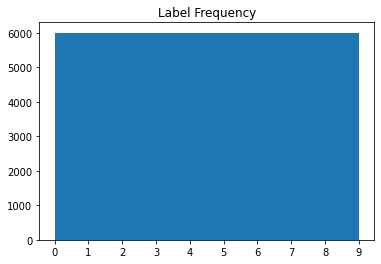

In [149]:
#Checking label distribution, uniform distribution 
train, test = fashion_mnist.load_data()
ds = tf.data.Dataset.from_tensor_slices(train)

vals = np.fromiter(ds.map(lambda x, y: y), float)

plt.hist(vals)
plt.xticks(range(10))
plt.title('Label Frequency')
plt.show()

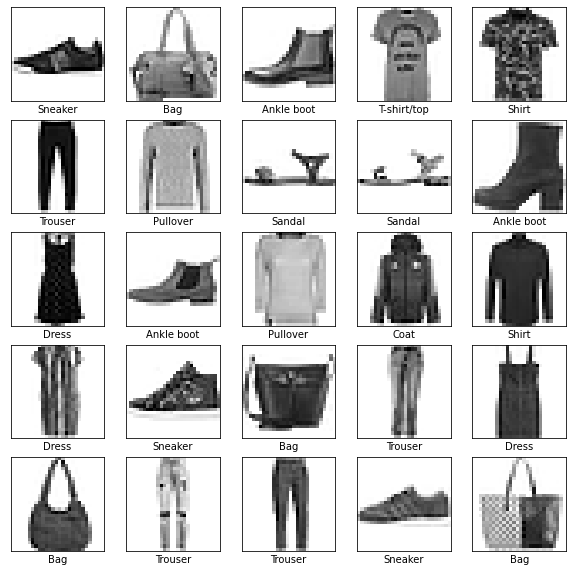

In [9]:

#Plotting a subset of data with labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [10]:
#scale to range 0 - 1 
train_images = train_images / 255.0
validation_images = validation_images / 255.0
test_images = test_images / 255.0

In [11]:
#display some images
def display_image(position):
    image = train_images[position]
    plt.title('Example %d. Label: %s' % (position, class_names[train_labels[position]]))
    plt.imshow(image, cmap=plt.cm.gray_r)

In [12]:
#display_image(22)

In [13]:
# explore the data
print('# of training images:', train_images.shape[0])
print('# of validation images:', validation_images.shape[0])
print('# of test images:', test_images.shape[0])

# of training images: 48000
# of validation images: 12000
# of test images: 10000


In [14]:
print(f"Image shape before: {train_images[0].shape}")

# Pad images with 0s since we want information in the edges, output size should now be 32,32
train_images      = np.pad(train_images, ((0,0),(2,2),(2,2)), 'constant')
validation_images = np.pad(validation_images, ((0,0),(2,2),(2,2)), 'constant')
test_images       = np.pad(test_images, ((0,0),(2,2),(2,2)), 'constant')

print(f"Updated Image Shape: {train_images[0].shape}.")


Image shape before: (28, 28)
Updated Image Shape: (32, 32).


In [15]:
#display_image(22)

In [16]:
#Baseline model architecture
bl_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1), kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),                      
    tf.keras.layers.Flatten(), #or Flatten(input_shape=(28, 28))
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#Print model summary
bl_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 6)         60        
                                                                 
 average_pooling2d (AverageP  (None, 15, 15, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        880       
                                                                 
 average_pooling2d_1 (Averag  (None, 6, 6, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 120)               6

In [17]:
#Compile model, use optimiser Adam
bl_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Setting number of epochs and batch size
EPOCHS = 15
BATCH_SIZE = 128

#add channel = 1 for greyscale
train_images=train_images[:,:,:,None]
validation_images=validation_images[:,:,:,None]
print("Training images shape: ", train_images.shape)
print("Validation images shape ", validation_images.shape)

X_train, y_train = train_images, to_categorical(train_labels)
X_validation, y_validation = validation_images, to_categorical(validation_labels)



Training images shape:  (48000, 32, 32, 1)
Validation images shape  (12000, 32, 32, 1)


In [18]:
#Fitting the model, performing training
bl_history=bl_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_validation, y_validation))

Epoch 1/15
375/375 [==============================] - 14s 5ms/step - loss: 0.8013 - accuracy: 0.7392 - val_loss: 0.5747 - val_accuracy: 0.8155
Epoch 2/15
375/375 [==============================] - 2s 4ms/step - loss: 0.5347 - accuracy: 0.8262 - val_loss: 0.5035 - val_accuracy: 0.8323
Epoch 3/15
375/375 [==============================] - 2s 4ms/step - loss: 0.4727 - accuracy: 0.8456 - val_loss: 0.4645 - val_accuracy: 0.8467
Epoch 4/15
375/375 [==============================] - 2s 4ms/step - loss: 0.4350 - accuracy: 0.8563 - val_loss: 0.4139 - val_accuracy: 0.8671
Epoch 5/15
375/375 [==============================] - 2s 4ms/step - loss: 0.4110 - accuracy: 0.8649 - val_loss: 0.4049 - val_accuracy: 0.8673
Epoch 6/15
375/375 [==============================] - 2s 4ms/step - loss: 0.3926 - accuracy: 0.8697 - val_loss: 0.3963 - val_accuracy: 0.8717
Epoch 7/15
375/375 [==============================] - 2s 4ms/step - loss: 0.3777 - accuracy: 0.8743 - val_loss: 0.3906 - val_accuracy: 0.8702
Epoch

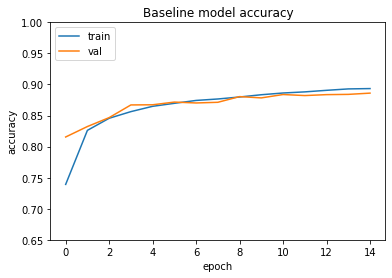

In [19]:
#Plotting the accuracy baseline model
plt.plot(bl_history.history['accuracy'])
plt.plot(bl_history.history['val_accuracy'])
plt.title('Baseline model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0.65, 1])
plt.show()

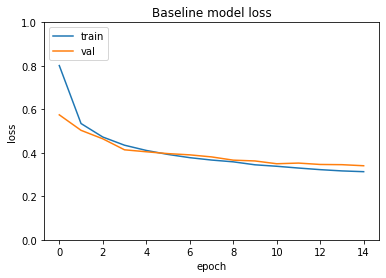

In [20]:
#Plotting the loss for baseline model
plt.plot(bl_history.history['loss'])
plt.plot(bl_history.history['val_loss'])
plt.title('Baseline model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0, 1])
plt.show()

In [21]:
#Printing the val & training loss and accuracy for baseline model 
print(f"Baseline model training accuracy: {bl_history.history['accuracy'][-1]} and validation accuracy: {bl_history.history['val_accuracy'][-1]}")
print(f"Baseline model training loss: {bl_history.history['loss'][-1]} and validation loss: {bl_history.history['val_loss'][-1]}")

Baseline model training accuracy: 0.8934166431427002 and validation accuracy: 0.8860833048820496
Baseline model training loss: 0.3132650852203369 and validation loss: 0.3405638039112091


In [22]:
#Save weights of model
bl_model.save_weights("bl_model")

In [23]:
#Model2 DropOut model architecture
dropout_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1), kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Dropout(0.2),                       
    tf.keras.layers.Flatten(), #or Flatten(input_shape=(28, 28))
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='softmax')
])
dropout_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 6)         60        
                                                                 
 average_pooling2d_2 (Averag  (None, 15, 15, 6)        0         
 ePooling2D)                                                     
                                                                 
 dropout (Dropout)           (None, 15, 15, 6)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 16)        880       
                                                                 
 average_pooling2d_3 (Averag  (None, 6, 6, 16)         0         
 ePooling2D)                                                     
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 16)         

In [24]:
#Compile and fit model
dropout_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
dropout_history=dropout_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_validation, y_validation))

Epoch 1/15
375/375 [==============================] - 2s 5ms/step - loss: 0.9032 - accuracy: 0.6940 - val_loss: 0.6114 - val_accuracy: 0.7897
Epoch 2/15
375/375 [==============================] - 2s 5ms/step - loss: 0.6062 - accuracy: 0.7910 - val_loss: 0.5151 - val_accuracy: 0.8210
Epoch 3/15
375/375 [==============================] - 2s 4ms/step - loss: 0.5396 - accuracy: 0.8163 - val_loss: 0.4630 - val_accuracy: 0.8469
Epoch 4/15
375/375 [==============================] - 2s 5ms/step - loss: 0.5023 - accuracy: 0.8287 - val_loss: 0.4485 - val_accuracy: 0.8542
Epoch 5/15
375/375 [==============================] - 2s 5ms/step - loss: 0.4755 - accuracy: 0.8380 - val_loss: 0.4175 - val_accuracy: 0.8656
Epoch 6/15
375/375 [==============================] - 2s 4ms/step - loss: 0.4583 - accuracy: 0.8420 - val_loss: 0.4220 - val_accuracy: 0.8595
Epoch 7/15
375/375 [==============================] - 2s 5ms/step - loss: 0.4470 - accuracy: 0.8456 - val_loss: 0.3903 - val_accuracy: 0.8743
Epoch 

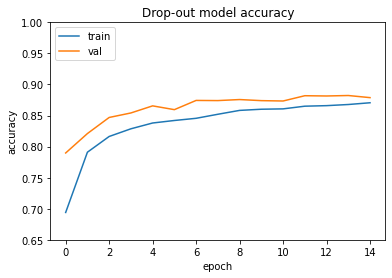

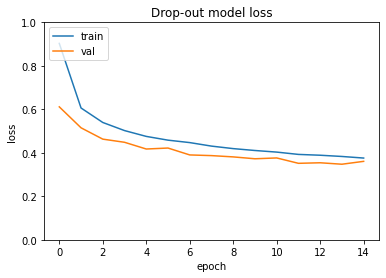

Dropout model training accuracy: 0.8705833554267883 and validation accuracy: 0.8788333535194397
Dropout model training loss: 0.3759509325027466 and validation loss: 0.3607933819293976


In [25]:
#Plotting the accuracy of dropout model
plt.plot(dropout_history.history['accuracy'])
plt.plot(dropout_history.history['val_accuracy'])
plt.title('Drop-out model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0.65, 1])
plt.show()

#Plotting the loss of dropout model
plt.plot(dropout_history.history['loss'])
plt.plot(dropout_history.history['val_loss'])
plt.title('Drop-out model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0, 1])
plt.show()

#Printing the val & training loss and accuracy of dropout model
print(f"Dropout model training accuracy: {dropout_history.history['accuracy'][-1]} and validation accuracy: {dropout_history.history['val_accuracy'][-1]}")
print(f"Dropout model training loss: {dropout_history.history['loss'][-1]} and validation loss: {dropout_history.history['val_loss'][-1]}")

In [26]:
#Saving weights of dropout model
dropout_model.save_weights("dropout_model")

In [27]:
#Model3 MaxPooling model architecture
maxpool_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1), kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.MaxPooling2D(),                      
    tf.keras.layers.Flatten(), #or Flatten(input_shape=(28, 28))
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

maxpool_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 6)         60        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 6)        0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 16)        880       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 576)               0         
                                                                 
 dense_6 (Dense)             (None, 120)              

In [28]:
#Compiling and fitting Maxpool model
maxpool_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
maxpool_history=maxpool_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_validation, y_validation))

Epoch 1/15
375/375 [==============================] - 2s 5ms/step - loss: 0.7390 - accuracy: 0.7588 - val_loss: 0.5273 - val_accuracy: 0.8296
Epoch 2/15
375/375 [==============================] - 2s 4ms/step - loss: 0.4877 - accuracy: 0.8414 - val_loss: 0.4540 - val_accuracy: 0.8578
Epoch 3/15
375/375 [==============================] - 2s 4ms/step - loss: 0.4367 - accuracy: 0.8596 - val_loss: 0.4332 - val_accuracy: 0.8596
Epoch 4/15
375/375 [==============================] - 2s 4ms/step - loss: 0.4057 - accuracy: 0.8685 - val_loss: 0.4016 - val_accuracy: 0.8696
Epoch 5/15
375/375 [==============================] - 2s 4ms/step - loss: 0.3779 - accuracy: 0.8783 - val_loss: 0.3837 - val_accuracy: 0.8767
Epoch 6/15
375/375 [==============================] - 2s 4ms/step - loss: 0.3629 - accuracy: 0.8830 - val_loss: 0.3827 - val_accuracy: 0.8752
Epoch 7/15
375/375 [==============================] - 2s 4ms/step - loss: 0.3455 - accuracy: 0.8880 - val_loss: 0.3550 - val_accuracy: 0.8862
Epoch 

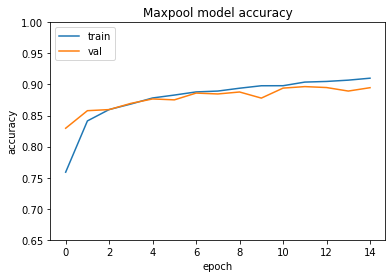

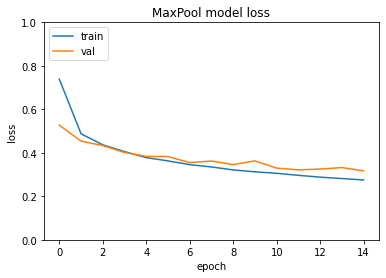

Maxpool model training accuracy: 0.9101250171661377 and validation accuracy: 0.8948333263397217
Maxpool model training loss: 0.2751384377479553 and validation loss: 0.31697410345077515


In [29]:
#Plotting the accuracy of maxpool model
plt.plot(maxpool_history.history['accuracy'])
plt.plot(maxpool_history.history['val_accuracy'])
plt.title('Maxpool model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0.65, 1])
plt.show()

#Plotting the loss of maxpool model
plt.plot(maxpool_history.history['loss'])
plt.plot(maxpool_history.history['val_loss'])
plt.title('MaxPool model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0, 1])
plt.show()

#Printing the val & training loss and accuracy of maxpool model
print(f"Maxpool model training accuracy: {maxpool_history.history['accuracy'][-1]} and validation accuracy: {maxpool_history.history['val_accuracy'][-1]}")
print(f"Maxpool model training loss: {maxpool_history.history['loss'][-1]} and validation loss: {maxpool_history.history['val_loss'][-1]}")

In [30]:
#Save weights of maxpool model
maxpool_model.save_weights("maxpool_model")

In [31]:
#Model4 More filters model architecture
filter_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1), kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),                      
    tf.keras.layers.Flatten(), #or Flatten(input_shape=(28, 28))
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

filter_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 average_pooling2d_4 (Averag  (None, 15, 15, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 average_pooling2d_5 (Averag  (None, 6, 6, 64)         0         
 ePooling2D)                                                     
                                                                 
 flatten_3 (Flatten)         (None, 2304)              0         
                                                                 
 dense_9 (Dense)             (None, 120)              

In [32]:
#Compile and fit filter model
filter_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
filter_history=filter_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_validation, y_validation))

Epoch 1/15
375/375 [==============================] - 3s 7ms/step - loss: 0.7572 - accuracy: 0.7661 - val_loss: 0.5638 - val_accuracy: 0.8163
Epoch 2/15
375/375 [==============================] - 2s 6ms/step - loss: 0.5051 - accuracy: 0.8363 - val_loss: 0.4632 - val_accuracy: 0.8509
Epoch 3/15
375/375 [==============================] - 2s 6ms/step - loss: 0.4521 - accuracy: 0.8522 - val_loss: 0.4370 - val_accuracy: 0.8583
Epoch 4/15
375/375 [==============================] - 2s 6ms/step - loss: 0.4193 - accuracy: 0.8610 - val_loss: 0.3996 - val_accuracy: 0.8717
Epoch 5/15
375/375 [==============================] - 2s 6ms/step - loss: 0.3965 - accuracy: 0.8681 - val_loss: 0.3948 - val_accuracy: 0.8712
Epoch 6/15
375/375 [==============================] - 3s 7ms/step - loss: 0.3783 - accuracy: 0.8748 - val_loss: 0.3782 - val_accuracy: 0.8789
Epoch 7/15
375/375 [==============================] - 2s 6ms/step - loss: 0.3654 - accuracy: 0.8778 - val_loss: 0.3766 - val_accuracy: 0.8760
Epoch 

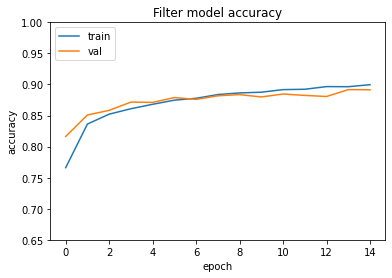

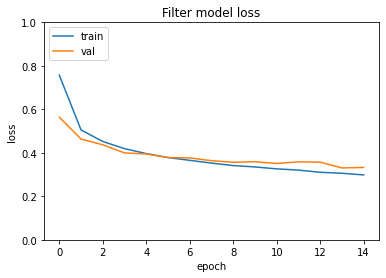

Filter model training accuracy: 0.8996458053588867 and validation accuracy: 0.8914999961853027
Filter model training loss: 0.2984515130519867 and validation loss: 0.3329189717769623


In [33]:
#Plotting the accuracy of filter model
plt.plot(filter_history.history['accuracy'])
plt.plot(filter_history.history['val_accuracy'])
plt.title('Filter model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0.65, 1])
plt.show()

#Plotting the loss of filter model
plt.plot(filter_history.history['loss'])
plt.plot(filter_history.history['val_loss'])
plt.title('Filter model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0, 1])
plt.show()

#Printing the val & training loss and accuracy of filter model
print(f"Filter model training accuracy: {filter_history.history['accuracy'][-1]} and validation accuracy: {filter_history.history['val_accuracy'][-1]}")
print(f"Filter model training loss: {filter_history.history['loss'][-1]} and validation loss: {filter_history.history['val_loss'][-1]}")

In [34]:
#Saving weights of filter model
filter_model.save_weights("filter_model")

In [35]:
#Model5 1 more convolutional layer model architecture
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1), kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),   
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),                   
    tf.keras.layers.Flatten(), #or Flatten(input_shape=(28, 28))
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

conv_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 6)         60        
                                                                 
 average_pooling2d_6 (Averag  (None, 15, 15, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 16)        880       
                                                                 
 average_pooling2d_7 (Averag  (None, 6, 6, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_10 (Conv2D)          (None, 4, 4, 32)          4640      
                                                                 
 average_pooling2d_8 (Averag  (None, 2, 2, 32)        

In [36]:
#Compiling and fitting conv model
conv_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
conv_history=conv_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_validation, y_validation))

Epoch 1/15
375/375 [==============================] - 2s 5ms/step - loss: 1.0702 - accuracy: 0.6595 - val_loss: 0.8018 - val_accuracy: 0.7261
Epoch 2/15
375/375 [==============================] - 2s 4ms/step - loss: 0.7611 - accuracy: 0.7467 - val_loss: 0.7273 - val_accuracy: 0.7551
Epoch 3/15
375/375 [==============================] - 2s 4ms/step - loss: 0.6963 - accuracy: 0.7685 - val_loss: 0.6802 - val_accuracy: 0.7755
Epoch 4/15
375/375 [==============================] - 2s 4ms/step - loss: 0.6520 - accuracy: 0.7789 - val_loss: 0.6464 - val_accuracy: 0.7755
Epoch 5/15
375/375 [==============================] - 2s 5ms/step - loss: 0.6224 - accuracy: 0.7930 - val_loss: 0.6191 - val_accuracy: 0.7917
Epoch 6/15
375/375 [==============================] - 2s 5ms/step - loss: 0.5951 - accuracy: 0.8040 - val_loss: 0.5792 - val_accuracy: 0.8122
Epoch 7/15
375/375 [==============================] - 2s 4ms/step - loss: 0.5754 - accuracy: 0.8109 - val_loss: 0.5652 - val_accuracy: 0.8117
Epoch 

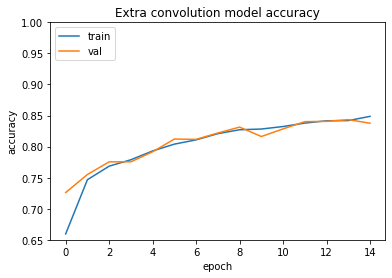

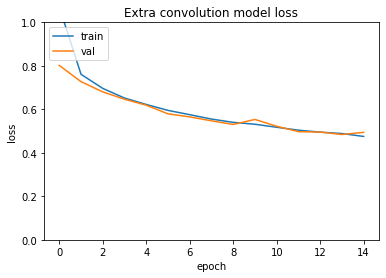

Extra convolution model training accuracy: 0.8487083315849304 and validation accuracy: 0.8376666903495789
Extra convolution model training loss: 0.4753468930721283 and validation loss: 0.49411433935165405


In [37]:
#Plotting the accuracy of conv model
plt.plot(conv_history.history['accuracy'])
plt.plot(conv_history.history['val_accuracy'])
plt.title('Extra convolution model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0.65, 1])
plt.show()

#Plotting the loss of conv model
plt.plot(conv_history.history['loss'])
plt.plot(conv_history.history['val_loss'])
plt.title('Extra convolution model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0, 1])
plt.show()

#Printing the val & training loss and accuracy of conv model
print(f"Extra convolution model training accuracy: {conv_history.history['accuracy'][-1]} and validation accuracy: {conv_history.history['val_accuracy'][-1]}")
print(f"Extra convolution model training loss: {conv_history.history['loss'][-1]} and validation loss: {conv_history.history['val_loss'][-1]}")

In [38]:
#Saving weights of conv model
conv_model.save_weights("conv_model")

In [39]:
#Learningrate decay model architecture
lr_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1), kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),                      
    tf.keras.layers.Flatten(), #or Flatten(input_shape=(28, 28))
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


lr_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 30, 30, 6)         60        
                                                                 
 average_pooling2d_9 (Averag  (None, 15, 15, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_12 (Conv2D)          (None, 13, 13, 16)        880       
                                                                 
 average_pooling2d_10 (Avera  (None, 6, 6, 16)         0         
 gePooling2D)                                                    
                                                                 
 flatten_5 (Flatten)         (None, 576)               0         
                                                                 
 dense_15 (Dense)            (None, 120)              

In [40]:
#Schedule function to reduce the learning rate to half every 5 epochs
def scheduler(epoch, lr):
  if epoch > 0 and (epoch % 5 == 0):
    return lr * 0.5
  else:
    return lr

#Create callback for adapting learning rate
callback = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose = 1)

In [41]:
#Set initial learningrate to 0.1, use SGD here instead of Adam as Adam has internal learning rate management that is not compatible with most learning rate schedules
opt = tf.keras.optimizers.SGD(learning_rate=0.1)
lr_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
lr_history=lr_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_validation, y_validation), callbacks=[callback])


Epoch 1: LearningRateScheduler setting learning rate to 0.10000000149011612.
Epoch 1/15
375/375 [==============================] - 2s 5ms/step - loss: 0.9960 - accuracy: 0.6565 - val_loss: 0.6734 - val_accuracy: 0.7492 - lr: 0.1000

Epoch 2: LearningRateScheduler setting learning rate to 0.10000000149011612.
Epoch 2/15
375/375 [==============================] - 2s 4ms/step - loss: 0.6219 - accuracy: 0.7784 - val_loss: 0.5699 - val_accuracy: 0.7964 - lr: 0.1000

Epoch 3: LearningRateScheduler setting learning rate to 0.10000000149011612.
Epoch 3/15
375/375 [==============================] - 2s 4ms/step - loss: 0.5533 - accuracy: 0.8038 - val_loss: 0.5369 - val_accuracy: 0.8123 - lr: 0.1000

Epoch 4: LearningRateScheduler setting learning rate to 0.10000000149011612.
Epoch 4/15
375/375 [==============================] - 1s 4ms/step - loss: 0.5126 - accuracy: 0.8238 - val_loss: 0.4820 - val_accuracy: 0.8348 - lr: 0.1000

Epoch 5: LearningRateScheduler setting learning rate to 0.100000001

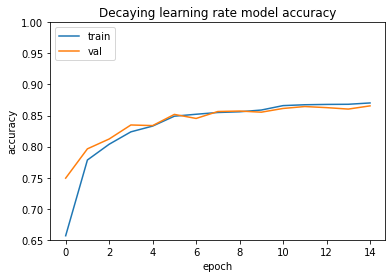

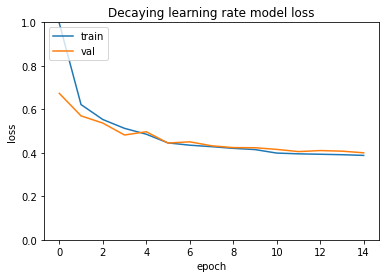

Decaying lr model training accuracy: 0.870270848274231 and validation accuracy: 0.8655833601951599
Decaying lr model training loss: 0.38816386461257935 and validation loss: 0.4000178277492523


In [42]:
#Plotting the accuracy for lr_model
plt.plot(lr_history.history['accuracy'])
plt.plot(lr_history.history['val_accuracy'])
plt.title('Decaying learning rate model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0.65, 1])
plt.show()

#Plotting the loss for lr_model
plt.plot(lr_history.history['loss'])
plt.plot(lr_history.history['val_loss'])
plt.title('Decaying learning rate model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0, 1])
plt.show()

#Printing the val & training loss and accuracy 
print(f"Decaying lr model training accuracy: {lr_history.history['accuracy'][-1]} and validation accuracy: {lr_history.history['val_accuracy'][-1]}")
print(f"Decaying lr model training loss: {lr_history.history['loss'][-1]} and validation loss: {lr_history.history['val_loss'][-1]}")

In [43]:
#save learning rate model
lr_model.save_weights("lr_model")

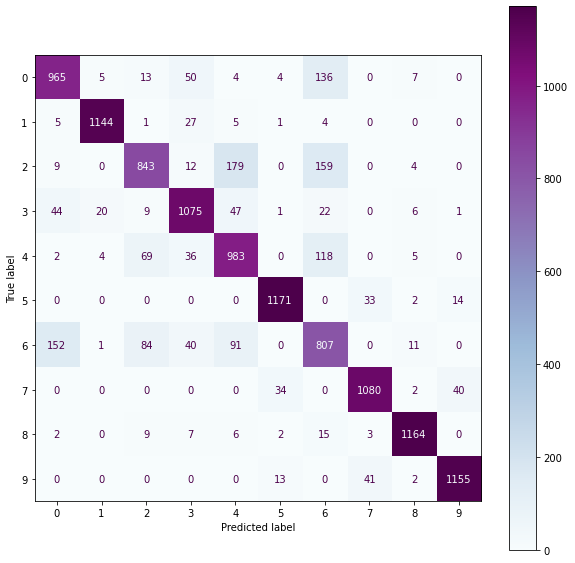

In [121]:
#Make confusion matrix with scikitlearn that shows number of images classified correctly and incorrectly
y_pred = lr_model.predict(validation_images)
y_true = validation_labels             
y_pred_class = np.argmax(y_pred, axis=1)

fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_predictions(validation_labels, y_pred_class, cmap="BuPu", ax=ax)  #BuPu, pink_r, PuBu, binary, Greens, CMRmap_r
plt.show()

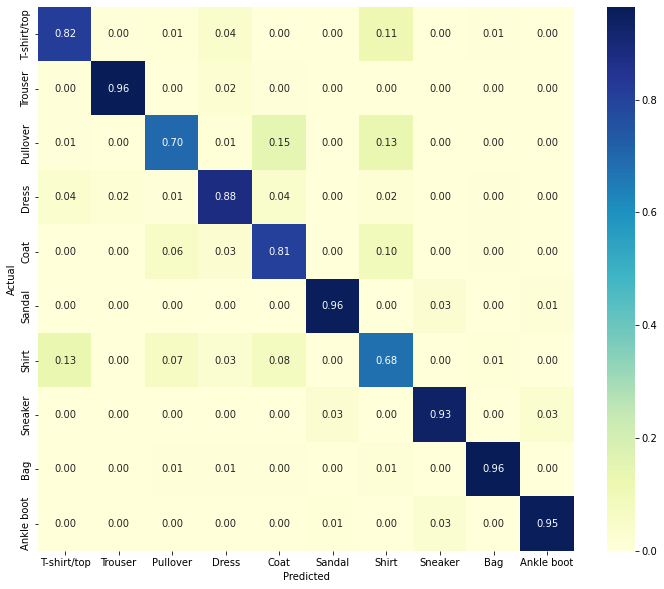

In [143]:
#Normalised heatmap using seaborn that shows percentage of correctly classified (and missclassified) labels
cm = confusion_matrix(validation_labels, y_pred_class)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=class_names, yticklabels=class_names, cmap="YlGnBu") #YlGnBu, Blues, CMRmap_r, pink_r, binary, BuPu, PuBu, Reds
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)